# The kepler_field plot in the paper.

In [1]:
%matplotlib inline

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from numpy import random

import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord

plotpar = {'axes.labelsize': 30,
           'font.size': 12,
           'legend.fontsize': 15,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data.

In [6]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Set the Position of the Sun and set up the Galactocentric coordinate frame.

In [11]:
# Solar coords
sun_xyz = [-8.122, 0, 0] * u.kpc
sun_vxyz = [12.9, 245.6, 7.78] * u.km/u.s

galcen_frame = coord.Galactocentric(galcen_distance=np.abs(sun_xyz[0]),
                                    galcen_v_sun=sun_vxyz,
                                    z_sun=27*u.pc)

Calculate x y z positions for a random selection of stars.

In [12]:
np.random.seed(42)
rand_inds = np.arange(len(df))
random.shuffle(rand_inds)
x, y, z = [], [], []
for i in rand_inds[:10000]:
    c = coord.SkyCoord(ra = df.ra.values[i] * u.deg,
                       dec = df.dec.values[i] * u.deg,
                       distance = (1./df.parallax.values[i]) * u.kpc)
    galcen = c.transform_to(galcen_frame)
    
    xyz = galcen.data.xyz
    x.append(xyz[0].value)
    y.append(xyz[1].value)
    z.append(xyz[2].value)

Plot those stars.

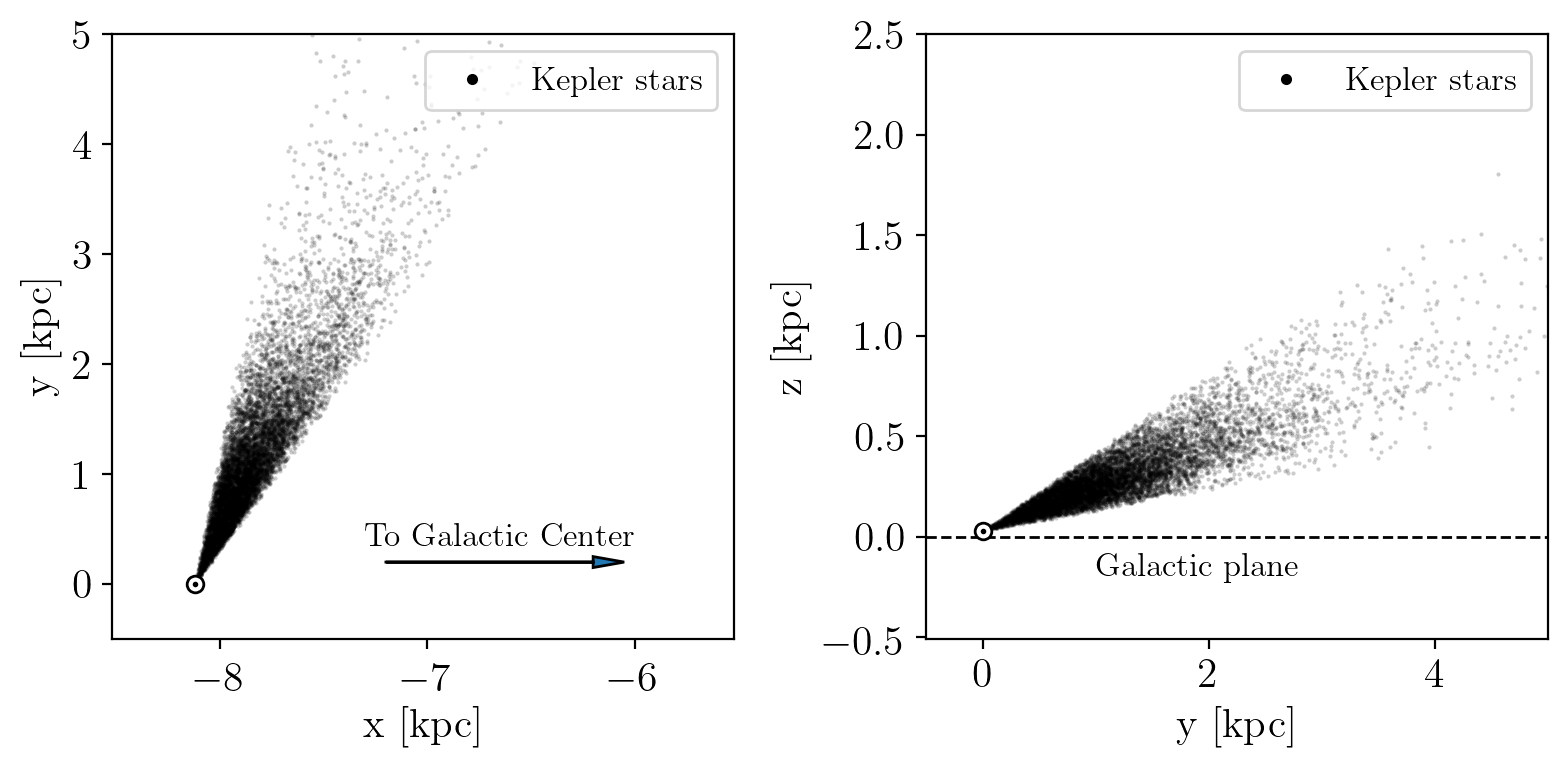

In [15]:
fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(121)
ax1.plot(x, y, "k.", alpha=.2, mec="none", ms=3, rasterized=True, label="$\mathrm{Kepler~stars}$")
legend = ax1.legend(loc="upper right", fontsize=12)
legend.legendHandles[0]._legmarker.set_markersize(8)
legend.legendHandles[0]._legmarker.set_alpha(1)

ax1.arrow(-7.2, .2, 1, 0, head_width=.1)
ax1.text(-7.3, .35, "$\mathrm{To~Galactic~Center}$")
ax1.plot(-8.122, 0, "wo", mec="k", ms=6)
ax1.plot(-8.122, 0, "k.", ms=2)
ax1.set_xlim(-8.52, -5.52)
ax1.set_ylim(-.5, 5)
ax1.set_xlabel("$\mathrm{x~[kpc]}$", fontsize=15)
ax1.set_ylabel("$\mathrm{y~[kpc]}$", fontsize=15)

ax2 = fig.add_subplot(122)
ax2.plot(y, z, "k.", alpha=.2, mec="none", ms=3, rasterized=True, label="$\mathrm{Kepler~stars}$")
legend = ax2.legend(fontsize=12)
legend.legendHandles[0]._legmarker.set_markersize(8)
legend.legendHandles[0]._legmarker.set_alpha(1)
ax2.plot(0, 27e-3, "wo", mec="k", ms=6)
ax2.plot(0, 27e-3, "k.", ms=2)
ax2.set_ylim(-.51, 2.5)
ax2.axhline(0, color="k", ls="--", lw=1, zorder=0)
ax2.text(1, -.2, "$\mathrm{Galactic~plane}$")
ax2.set_xlim(-.5, 5)
ax2.set_xlabel("$\mathrm{y~[kpc]}$", fontsize=15)
ax2.set_ylabel("$\mathrm{z~[kpc]}$", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/kepler_field")
plt.savefig("../paper/kepler_field.pdf")